# 코로나 확진자 추이 분석
### 사용 데이터
- [Covid-19 Global Dataset](https://www.kaggle.com/datasets/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_daily_data.csv)
- Daily Data Columns Description
  - date: designates the date of observation of the row's data in YYYY-MM-DD format. (2020.01.22~2022.03.17)    
  - country: designates the Country in which the the row's data was observed.  
  - cumulative_total_cases: designates the cumulative number of confirmed cases as of the row's date, for the row's country.  
  - daily_new_cases: designates the daily new number of confirmed cases on the row's date, for the row's country.  
  - active_cases: designates the number of active cases (i.e., confirmed cases that still didn't recover nor die) on the row's date, for the row's country.  
  - cumulative_total_deaths: designates the cumulative number of confirmed deaths as of the row's date, for the row's country.  
  - daily_new_deaths: designates the daily new number of confirmed deaths on the row's date, for the row's country.  

## 1. 데이터 준비

### 1-1. 데이터 읽어오기

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("./data/worldometer_coronavirus_daily_data.csv")
covid = data # 혹시 모를 상황을 대비하여 데이터 복사
covid.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


### 1-2. 데이터 확인하기

In [ ]:
covid.shape

(170917, 7)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170917 entries, 0 to 170916
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     170917 non-null  object 
 1   country                  170917 non-null  object 
 2   cumulative_total_cases   170917 non-null  float64
 3   daily_new_cases          161237 non-null  float64
 4   active_cases             161011 non-null  float64
 5   cumulative_total_deaths  164059 non-null  float64
 6   daily_new_deaths         145063 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.1+ MB


=> 1. 결측치가 있는 것으로 보인다.  
=> 2. 국가별 날짜별 확진자 추이를 보고자 하므로 4,5,6번 열은 필요없어 보인다.

### 1-3. 데이터 전처리

In [ ]:
# 필요없는 column 지우기
covid.drop(columns = ['active_cases', 'cumulative_total_deaths', 'daily_new_deaths'], inplace=True)
covid.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases'], dtype='object')

In [ ]:
# 결측치 확인
covid.isnull().sum()

date                         0
country                      0
cumulative_total_cases       0
daily_new_cases           9680
dtype: int64

In [ ]:
covid['daily_new_cases'].value_counts()

0.0        39634
1.0         3873
2.0         2659
3.0         2175
4.0         1840
           ...  
84695.0        1
81005.0        1
68400.0        1
62597.0        1
6181.0         1
Name: daily_new_cases, Length: 15835, dtype: int64

=> 확진자 수가 '0'인 데이터가 있으므로 결측치가 있는 아이템(행)은 수집된 것이 없는 것으로 추측된다. 따라서 결측치 행은 제거하고자 합니다.

In [ ]:
# 결측치 제거
covid = covid.dropna()
covid.isnull().sum()

date                      0
country                   0
cumulative_total_cases    0
daily_new_cases           0
dtype: int64

In [ ]:
# 중복치 확인
covid.duplicated().sum()

0

In [ ]:
# 최종 분석 데이터 확인
covid.info()
covid.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161237 entries, 10 to 170916
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   date                    161237 non-null  object 
 1   country                 161237 non-null  object 
 2   cumulative_total_cases  161237 non-null  float64
 3   daily_new_cases         161237 non-null  float64
dtypes: float64(2), object(2)
memory usage: 6.2+ MB


,date,country,cumulative_total_cases,daily_new_cases
10,2020-2-25,Afghanistan,1.0,0.0
11,2020-2-26,Afghanistan,1.0,0.0
12,2020-2-27,Afghanistan,1.0,0.0
13,2020-2-28,Afghanistan,1.0,0.0
14,2020-2-29,Afghanistan,1.0,0.0


## 2. 데이터 분석
- 연도 및 월별 확진자 추이 확인

In [ ]:
covid.reset_index(drop=True, inplace=True)

In [ ]:
a = covid['date'].apply(lambda x: x.split('-')[1].zfill(2))
a

0         02
1         02
2         02
3         02
4         02
          ..
161232    03
161233    03
161234    03
161235    03
161236    03
Name: date, Length: 161237, dtype: object

In [ ]:
covid['date'] = covid['date'].apply(lambda x: x.split('-'))
covid['date'] = covid['date'].apply(lambda x: '-'.join([x[0], x[1].zfill(2), x[2]])) # 일자별 분석을 할 수도 있으므로 'date'의 형식을 변경함
covid['Year-Month'] = covid['date'].apply(lambda x: '-'.join(x.split('-')[:2]))
covid.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,date,country,cumulative_total_cases,daily_new_cases,Year-Month
0,2020-02-25,Afghanistan,1.0,0.0,2020-02
1,2020-02-26,Afghanistan,1.0,0.0,2020-02
2,2020-02-27,Afghanistan,1.0,0.0,2020-02
3,2020-02-28,Afghanistan,1.0,0.0,2020-02
4,2020-02-29,Afghanistan,1.0,0.0,2020-02


모든 나라를 가지고 하기에는 극단치가 있을 것 같다. 극단치를 확인하기에는 데이터가 너무 많다.  
=> 코치님, 이럴 때 극단치는 어떻게 확인하면 될까요? 

따라서 2022년 3월 17일 기준 누적 확진자 수를 기준으로 상위 20개의 국가만을 가지고 확인해보고자 한다.

In [ ]:
top_country = list(covid[covid['date'] == '2022-03-17'].sort_values(by='cumulative_total_cases', ascending=False).head(20).country)
top_country

['USA',
 'India',
 'Brazil',
 'France',
 'UK',
 'Germany',
 'Russia',
 'Turkey',
 'Italy',
 'Spain',
 'Argentina',
 'South Korea',
 'Netherlands',
 'Viet Nam',
 'Iran',
 'Colombia',
 'Indonesia',
 'Japan',
 'Poland',
 'Mexico']

In [ ]:
covid_top = covid[covid.country.isin(top_country)].reset_index(drop=True)
covid_top

,date,country,cumulative_total_cases,daily_new_cases,Year-Month
0,2020-03-04,Argentina,1.0,0.0,2020-03
1,2020-03-05,Argentina,2.0,1.0,2020-03
2,2020-03-06,Argentina,8.0,6.0,2020-03
3,2020-03-07,Argentina,9.0,1.0,2020-03
4,2020-03-08,Argentina,12.0,3.0,2020-03
...,...,...,...,...,...
15081,2022-03-13,Viet Nam,6461085.0,176489.0,2022-03
15082,2022-03-14,Viet Nam,6628702.0,167617.0,2022-03
15083,2022-03-15,Viet Nam,6811097.0,182395.0,2022-03
15084,2022-03-16,Viet Nam,6996311.0,185214.0,2022-03


In [ ]:
covid_top.groupby('Year-Month')['daily_new_cases'].mean()

Year-Month
2020-02        39.444444
2020-03      1259.971429
2020-04      3386.158333
2020-05      3441.190323
2020-06      4980.493333
2020-07      8876.306452
2020-08     10279.485484
2020-09     11451.316667
2020-10     14856.690323
2020-11     21687.965000
2020-12     24544.817742
2021-01     24392.704839
2021-02     14325.553571
2021-03     16313.204839
2021-04     29325.445000
2021-05     25940.304839
2021-06     13943.045000
2021-07     17710.116129
2021-08     22398.396774
2021-09     18112.618333
2021-10     13543.606452
2021-11     17229.653333
2021-12     32442.879032
2022-01    107275.093548
2022-02     71885.617857
2022-03     60323.461765
Name: daily_new_cases, dtype: float64

In [ ]:
covid_top['Year-Month'].unique()

array(['2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
       '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02',
       '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08',
       '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02',
       '2022-03', '2020-02'], dtype=object)

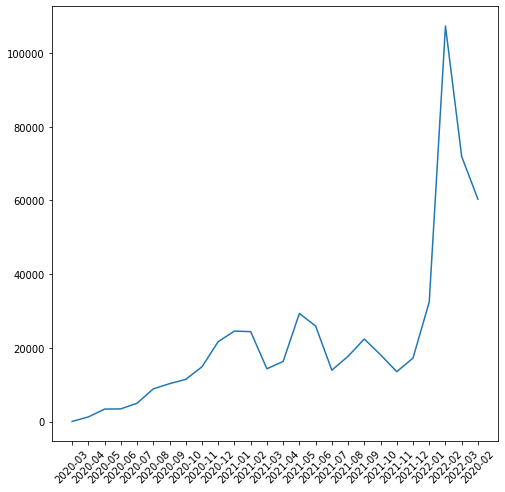

In [ ]:
plt.figure(figsize=(8,8))
x = covid_top['Year-Month'].unique()
y = covid_top.groupby('Year-Month')['daily_new_cases'].mean()
# plt.xlabel('Year', size = 13)
# plt.ylabel('Number of Trips', size = 13)
plt.xticks(rotation=45)
plt.plot(x, y)
plt.show()

=> 오미크론의 영향으로 지난 2년 간의 데이터와 비교하는 데에는 어려움이 있다.   
=> 따라서 2022년도 데이터만 보고자 한다.


In [ ]:
covid_2022 = covid_top[covid_top.apply(lambda x: x['Year-Month'].startswith('2022'), axis=1)]

In [ ]:
covid_2022.date.unique()

array(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
       '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
       '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
       '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
       '2022-01-29', '2022-01-30', '2022-01-31', '2022-02-01',
       '2022-02-02', '2022-02-03', '2022-02-04', '2022-02-05',
       '2022-02-06', '2022-02-07', '2022-02-08', '2022-02-09',
       '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17',
       '2022-02-18', '2022-02-19', '2022-02-20', '2022-02-21',
       '2022-02-22', '2022-02-23', '2022-02-24', '2022-02-25',
       '2022-02-26', '2022-02-27', '2022-02-28', '2022-03-01',
       '2022-03-02', '2022-03-03', '2022-03-04', '2022-

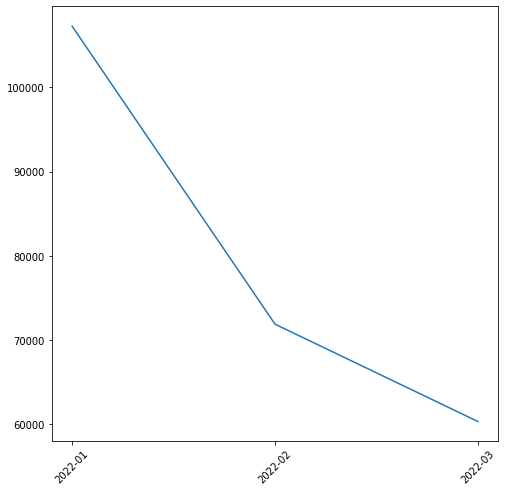

In [ ]:
plt.figure(figsize=(8,8))
x = covid_2022['Year-Month'].unique()
y = covid_2022.groupby('Year-Month')['daily_new_cases'].mean()
# plt.xlabel('Year', size = 13)
# plt.ylabel('Number of Trips', size = 13)
plt.xticks(rotation=45)
plt.plot(x, y)
plt.show()

최근 데이터도 추가하여 비교해고자 한다.

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid_world_weekly_trend.csv")
covid_weekly = data2 # 혹시 모를 상황을 대비하여 데이터 복사
covid_weekly.head()

,"Country, Other",Cases in the last 7 days,Cases in the preceding 7 days,Weekly Case % Change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death % Change,Deaths in the last 7 days/1M pop,Population
0,Afghanistan,308,291,6.0,8.0,5,6,-17,0.1,40483797
1,Albania,236,471,-50.0,82.0,2,0,200,0.7,2872219
2,Algeria,31,48,-35.0,0.7,0,0,0,0.0,45256195
3,Andorra,304,311,-2.0,3923.0,0,0,0,0.0,77484
4,Angola,0,56,-100.0,0.0,0,0,0,0.0,34679470


In [ ]:
covid_weekly.rename(columns={'Country, Other': 'country', 'Cases in the last 7 days': 'cases_now', 'Cases in the preceding 7 days': 'cases_prec', 'Weekly Case % Change': 'case_change',
'Cases in the last 7 days/1M pop': 'cases_1m', 'Deaths in the last 7 days': 'deaths_now', 'Deaths in the preceding 7 days': 'deaths_prec',
'Weekly Death % Change': 'death_change', 'Deaths in the last 7 days/1M pop': 'deaths_1m', 'Population': 'population'
}, inplace=True) # Reanme columns

In [ ]:
covid_weekly.drop(columns = ['deaths_now', 'deaths_prec','death_change', 'deaths_1m'], inplace=True)

In [ ]:
top_country

['USA',
 'India',
 'Brazil',
 'France',
 'UK',
 'Germany',
 'Russia',
 'Turkey',
 'Italy',
 'Spain',
 'Argentina',
 'South Korea',
 'Netherlands',
 'Viet Nam',
 'Iran',
 'Colombia',
 'Indonesia',
 'Japan',
 'Poland',
 'Mexico']

In [ ]:
covid_weekly['country'] = covid_weekly['country'].replace({'S. Korea': 'South Korea', 'Vietnam': 'Viet Nam'})

In [ ]:
covid_top2 = covid_weekly[covid_weekly.country.isin(top_country)].reset_index(drop=True)
covid_top2

,country,cases_now,cases_prec,case_change,cases_1m,population
0,Argentina,10877,13164,-17.0,237.0,45931949
1,Brazil,143800,157732,-9.0,668.0,215241599
2,Colombia,2135,2244,-5.0,41.0,51845560
3,France,935108,952013,-2.0,14270.0,65529910
4,Germany,977384,1256200,-22.0,11600.0,84259518
5,India,7091,7710,-8.0,5.0,1404087743
6,Indonesia,11434,18278,-37.0,41.0,278657588
7,Iran,21725,19034,14.0,253.0,85901102
8,Italy,438144,476296,-8.0,7266.0,60304008
9,Japan,336779,325285,4.0,2677.0,125789190


In [ ]:
prec = covid_top2['cases_prec'].mean()
now = covid_top2['cases_now'].mean()

In [ ]:
x = list(covid_2022['Year-Month'].unique())
x.extend(['0330 - 0405', '0406 - 0413'])
y = list(covid_2022.groupby('Year-Month')['daily_new_cases'].mean())
y.extend([prec, now])
y

[107275.0935483871, 71885.61785714286, 60323.461764705884, 332555.1, 265302.1]

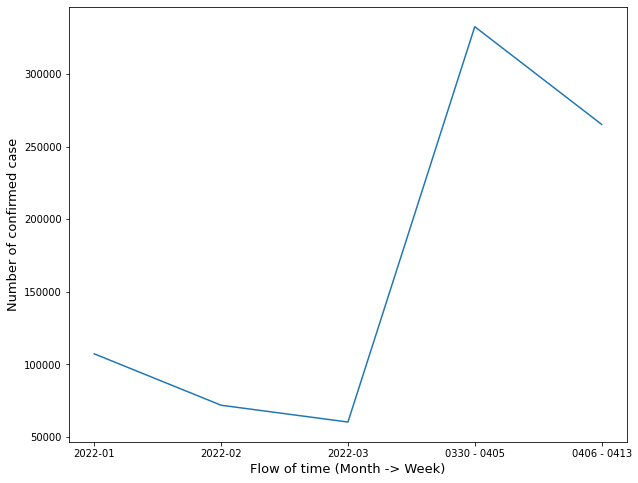

In [ ]:
plt.figure(figsize=(10,8))
plt.xlabel('Flow of time (Month -> Week)', size = 13)
plt.ylabel('Number of confirmed case', size = 13)
plt.plot(x, y)
plt.show()

In [ ]:
print('올해 1월에 비해 최근 1주간 일일 확진자 수는 평균', round(y[0]/y[4]*100, 2), '% 늘었습니다.')

올해 1월에 비해 최근 1주간 일일 확진자 수는 평균 40.44 % 늘었습니다.


=> 그대로 사용하기 어렵다. 확진자가 감소 추세라고 단언할 수 없지만, 서비스 제작을 위해 2022 01 ~ 03 만 써야할 것 같습니다.